In [198]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
import warnings
warnings.filterwarnings("ignore")


TabelaTeste = pd.read_csv('TabelaTestes.csv')
df = pd.read_csv('ds_modified.csv')
parametros = ['Valence','Acousticness','Danceability',
              'Duration_min','Energy','Instrumentalness',
              'Liveness','Loudness','Speechiness','Tempo',
              'Popularity','EnergyLiveness']
dados = df[parametros]

escala = RobustScaler()
dados_normalizados = escala.fit_transform(dados)

#Número de musicas de entrada e saída
entrada = 4
saida = 5

'''
Playlists de entrada:
PopF
PopM
Heavy Metal
Classica
Funk
Samba
Rap
'''

Genero='Rap'

# **Método do cotovelo para determinar a quantidade de clusters**

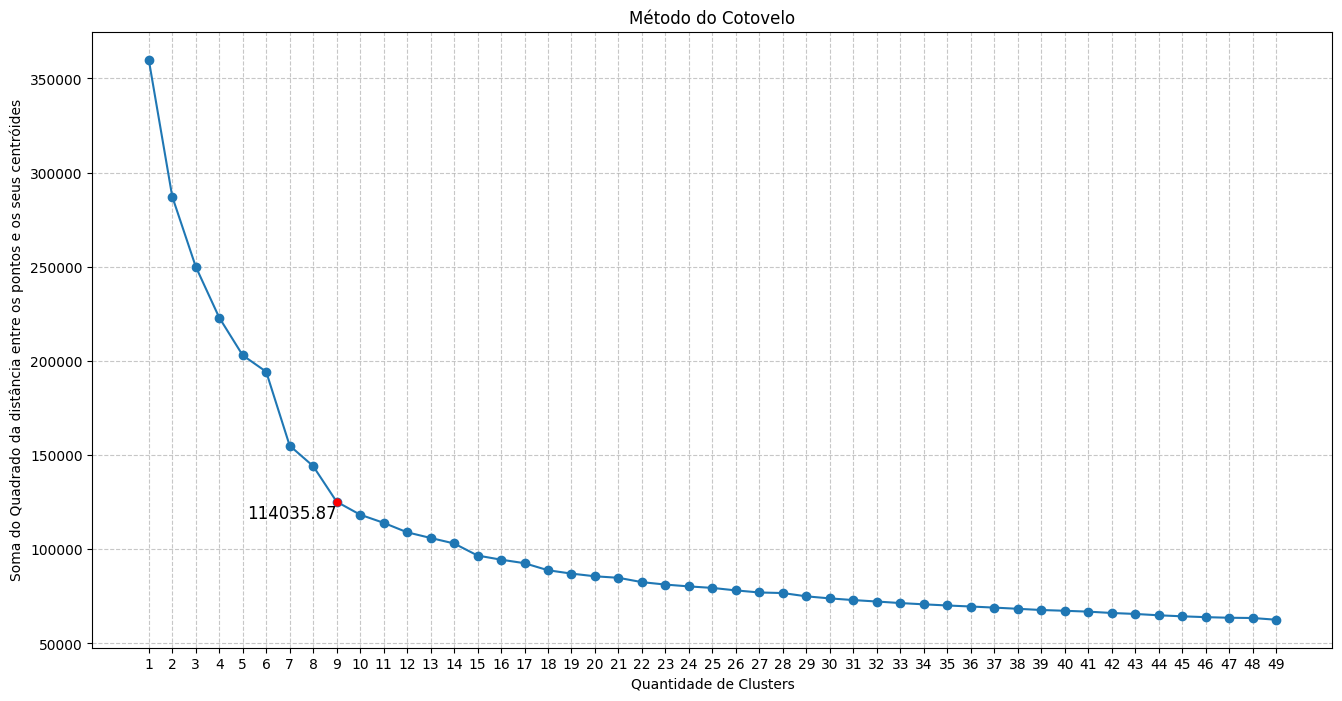

In [199]:
#método do cotovelo
'''
sqr = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=21)
    kmeans.fit(dados_normalizados)
    sqr.append(kmeans.inertia_)

plt.figure(figsize=(16, 8))
plt.plot(k_range, sqr, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Quantidade de Clusters')
plt.ylabel('Soma do Quadrado da distância entre os pontos e os seus centróides')
plt.plot(9, sqr[8], marker='.', color='red', markersize=10)
plt.text(9, sqr[10], f'{sqr[10]:.2f}', ha='right', va='bottom', fontsize=12, color='black')


plt.xticks(range(1, 50, 1))
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()
'''
from IPython.display import Image
Image("MC.png")


# **K-means**


In [200]:
k = 9
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=21)
kmeans.fit(dados_normalizados)

df['cluster'] = kmeans.labels_


#**Cálculo do PCA - usado nas visualizações**

In [201]:
pca = PCA(n_components=3)
dados_pca = pca.fit_transform(dados_normalizados)

df['PCA1'] = dados_pca[:, 0]
df['PCA2'] = dados_pca[:, 1]
df['PCA3'] = dados_pca[:, 2]



# **Animação da clusterização**

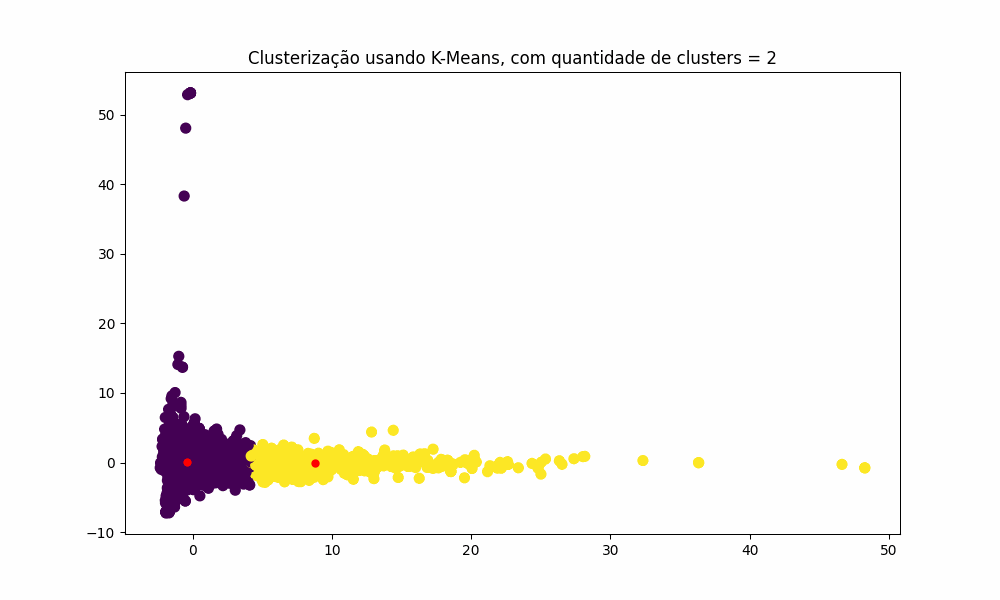

In [202]:
'''
def update(frame):
    k = frame + 2
    kmeans = KMeans(n_clusters=k, init='k-means++',random_state=21)
    kmeans.fit(dados_pca)
    ax.clear()
    ax.scatter(dados_pca[:, 0], dados_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='.', s=100)
    ax.set_title(f'Clusterização usando K-Means, com quantidade de clusters = {k}')


fig, ax = plt.subplots(figsize=(10, 6))
ani = animation.FuncAnimation(fig, update, frames=range(8), interval=1000, repeat=False)

from IPython.display import HTML
ani.save("animacaoKmeans.gif", writer="pillow")
plt.close(fig)
'''

from IPython.display import Image
Image("animacaoKmeans.gif")

# **Visualização dos clusters**

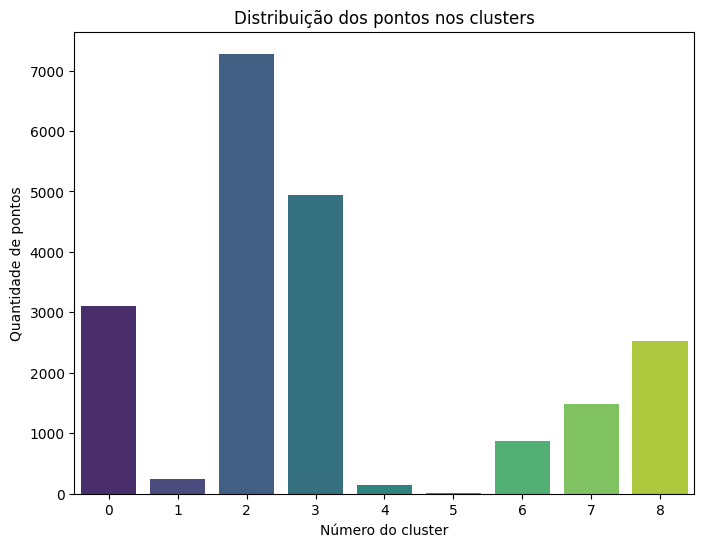

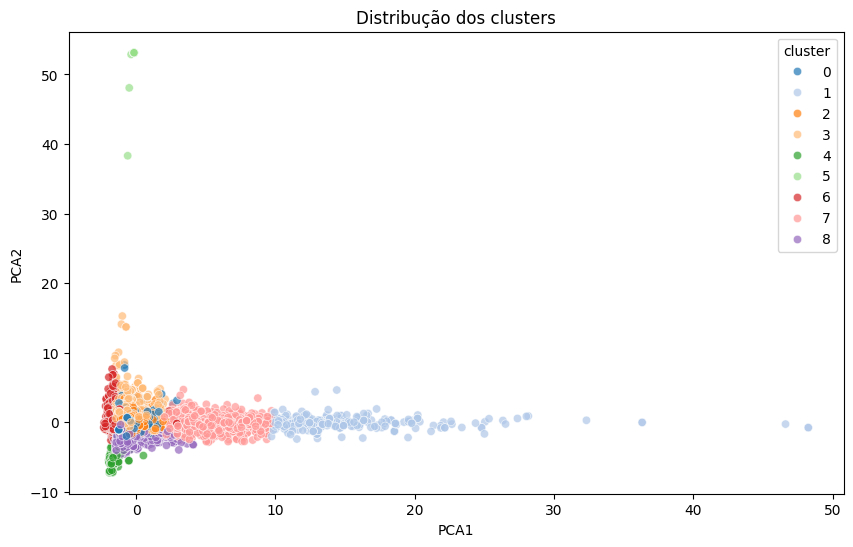

In [203]:
#Visualização da distribuição dos pontos em cada cluster, e visualização dos clusters

palettes = sns.color_palette("tab20", n_colors=9)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster', palette='viridis')
plt.title('Distribuição dos pontos nos clusters')
plt.xlabel('Número do cluster')
plt.ylabel('Quantidade de pontos')
plt.show()

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x=df['PCA1'],
    y=df['PCA2'],
    hue=df['cluster'],
    palette=palettes,
    alpha=0.7
)

plt.title('Distribução dos clusters')
plt.show()

In [204]:
# características médias por cluster
cluster_summary = df.groupby('cluster')[parametros].mean()
print(cluster_summary)


          Valence  Acousticness  Danceability  Duration_min    Energy  \
cluster                                                                 
0        0.579151      0.211592      0.603310      3.683976  0.752111   
1        0.561009      0.207533      0.674480      3.732507  0.683472   
2        0.613617      0.164603      0.663422      3.565547  0.751663   
3        0.425896      0.482789      0.554730      4.084908  0.458882   
4        0.549777      0.447319      0.635895      2.970553  0.487091   
5        0.474084      0.190250      0.489392     74.125465  0.827417   
6        0.185113      0.880982      0.331280      3.258898  0.126816   
7        0.523583      0.202185      0.664227      3.769170  0.669210   
8        0.551974      0.228704      0.712172      3.515091  0.659244   

         Instrumentalness  Liveness   Loudness  Speechiness       Tempo  \
cluster                                                                   
0                0.029506  0.483194  -5.988452

# **Seleção da músicas usadas na entrada do algoritmo**

In [205]:
Lista_id_musicas = TabelaTeste.loc[TabelaTeste['Genero'] == Genero]['Musicas']
Lista_id_artistas = TabelaTeste.loc[TabelaTeste['Genero'] == Genero]['Artistas']
linha = df.loc[((df['Track'] == Lista_id_musicas.iloc[0]) & (df['Artist'] == Lista_id_artistas.iloc[0])) |
               ((df['Track'] == Lista_id_musicas.iloc[1]) & (df['Artist'] == Lista_id_artistas.iloc[1])) |
               ((df['Track'] == Lista_id_musicas.iloc[2]) & (df['Artist'] == Lista_id_artistas.iloc[2])) |
               ((df['Track'] == Lista_id_musicas.iloc[3]) & (df['Artist'] == Lista_id_artistas.iloc[3]))]

colunas = linha[['Valence','Acousticness','Danceability',
                 'Duration_min','Energy','Instrumentalness',
                 'Liveness','Loudness','Speechiness',
                 'Tempo','Popularity','EnergyLiveness']]
colunas = escala.transform(colunas)

pontos = [linha for linha in colunas[:entrada]]
musicas = np.stack([pontos[0], pontos[1], pontos[2],pontos[3]])
pontoMedio = np.mean(musicas, axis=0)
pontoMedio = pontoMedio.reshape(1, -1)
cluster = kmeans.predict(pontoMedio)

pca_pontoMedio = pca.transform(pontoMedio)
pca1 = pca_pontoMedio[0, 0]
pca2 = pca_pontoMedio[0, 1]
pca3 = pca_pontoMedio[0, 2]

dados_cluster = df[df['cluster'].isin(cluster)]

dadosMusicas = linha[['Artist','Track','cluster']]
dadosMusicas = [linha.tolist() for _, linha in dadosMusicas.head(4).iterrows()]
print("----------Playlist passada como entrada----------\n")
print("Nome do Artista - Nome da música - Nº do Cluster\n")
for i in range(len(dadosMusicas)):
  print(f"{dadosMusicas[i]}\n")



----------Playlist passada como entrada----------

Nome do Artista - Nome da música - Nº do Cluster

["Racionais MC's", 'Capi?tulo 4, Versi?culo 3', 8]

["Racionais MC's", 'Dia?rio de um Detento', 8]

["Racionais MC's", 'Jesus Chorou', 8]

["Racionais MC's", 'Negro Drama', 8]



# **Visualização do ponto médio das músicas**

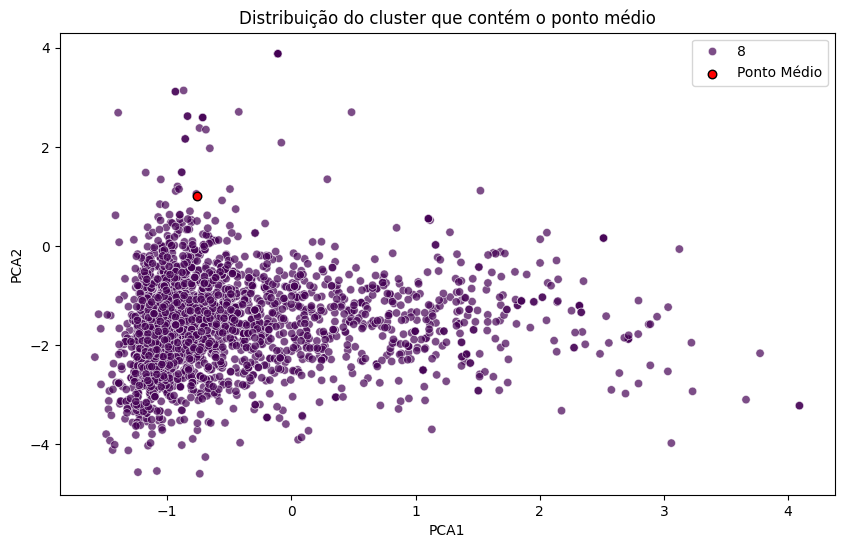

In [206]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=dados_cluster['PCA1'],
    y=dados_cluster['PCA2'],
    hue=dados_cluster['cluster'],
    palette='viridis',
    alpha=0.7
)

plt.scatter(
      pca1,
      pca2,
      s=150,
      edgecolor='black',
      color='red',
      label=f"Ponto Médio",
      marker='.'
    )

plt.title('Distribuição do cluster que contém o ponto médio')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.legend()
plt.show()

# **Cálculo dos pontos com menor distância euclidiana para o ponto médio**

In [207]:
totalPontos = dados_cluster[parametros].values
totalPontos = escala.transform(totalPontos)

total_distancias = np.sum(np.linalg.norm(totalPontos[:, np.newaxis] - pontoMedio, axis=2), axis=1)

pontosProximosIndice = []
pontosProximos = []
pontosProximosInfo = []

musicas_entrada = set(linha['Track'])
musicas_repetidas = set()
indice_mais_proximo = np.argmin(total_distancias)

for _ in range(saida):

  track_artist = dados_cluster.iloc[indice_mais_proximo]['Track']

  while  track_artist in musicas_entrada or track_artist in musicas_repetidas:
    total_distancias[indice_mais_proximo] = np.inf
    indice_mais_proximo = np.argmin(total_distancias)
    track_artist = dados_cluster.iloc[indice_mais_proximo]['Track']

  musicas_repetidas.add(track_artist)


  indice_mais_proximo = np.argmin(total_distancias)
  pontosProximosIndice.append(indice_mais_proximo)
  pontosProximos.append(totalPontos[indice_mais_proximo])
  pontosProximosInfo.append(dados_cluster.iloc[indice_mais_proximo])
  total_distancias[indice_mais_proximo] = np.inf



dadosMusicas = linha[['Artist','Track','cluster']]
dadosMusicas = [linha.tolist() for _, linha in dadosMusicas.head(4).iterrows()]
print("----------Playlist passada como entrada----------\n")
print("Nome do Artista - Nome da música - Nº do Cluster\n")
for i in range(len(dadosMusicas)):
  print(f"{dadosMusicas[i]}\n")
print("\n\n---------Playlist Recomendada---------\n")
for i in range(saida):
    print(f"\nInformações do {i + 1}º ponto mais próximo:")
    print(f"Nome da Música: {pontosProximosInfo[i]['Track']}")
    print(f"Artista: {pontosProximosInfo[i]['Artist']}")



----------Playlist passada como entrada----------

Nome do Artista - Nome da música - Nº do Cluster

["Racionais MC's", 'Capi?tulo 4, Versi?culo 3', 8]

["Racionais MC's", 'Dia?rio de um Detento', 8]

["Racionais MC's", 'Jesus Chorou', 8]

["Racionais MC's", 'Negro Drama', 8]



---------Playlist Recomendada---------


Informações do 1º ponto mais próximo:
Nome da Música: Let's Go 3 (feat. MC Marks, Mc Don Juan, MC PH, Mc Luki, Mc Paiva ZS, MC GP & Makalo)
Artista: Mc IG

Informações do 2º ponto mais próximo:
Nome da Música: Mel Made Me Do It
Artista: Stormzy

Informações do 3º ponto mais próximo:
Nome da Música: In The Heights
Artista: Stephanie Beatriz

Informações do 4º ponto mais próximo:
Nome da Música: Antes y Después
Artista: Kendo Kaponi

Informações do 5º ponto mais próximo:
Nome da Música: El Diablo Anda Suelto
Artista: La Santa Grifa


# **Visualização do ponto médio e dos pontos que representam as músicas recomendadas**

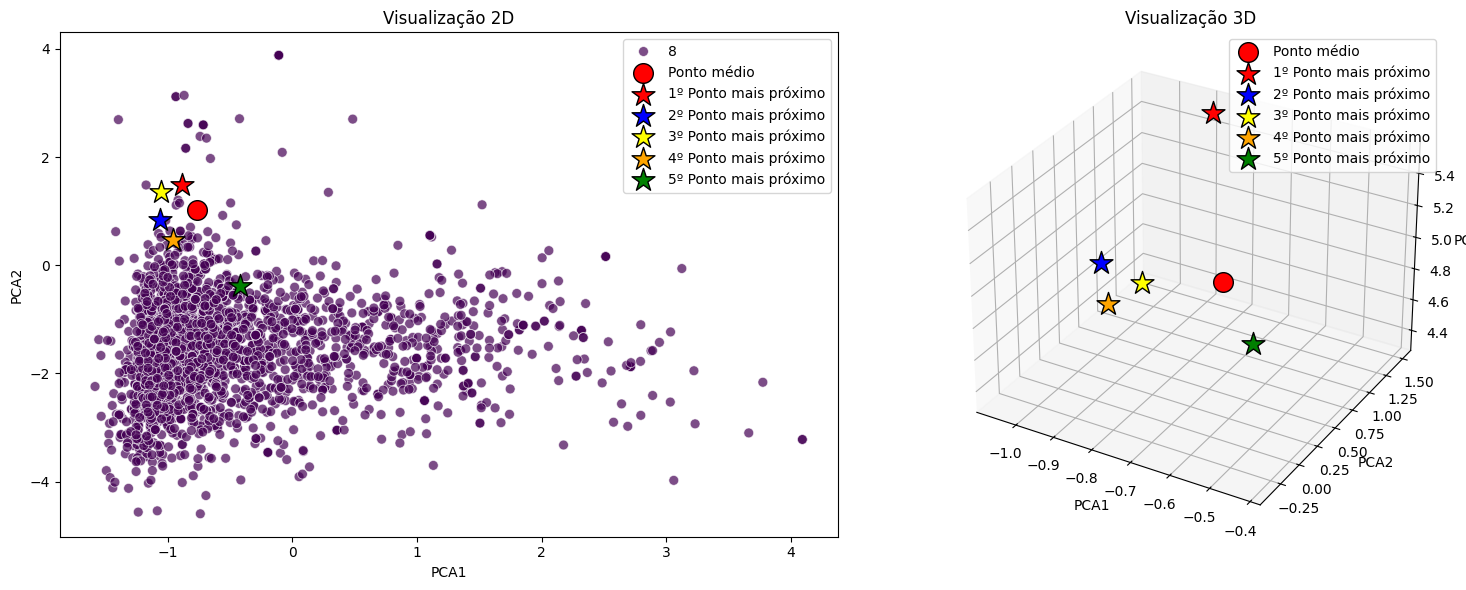



Distância de cada música para o ponto médio
Distância da música 1: 1.5316398191832707
Distância da música 2: 1.5595971319276623
Distância da música 3: 1.6221177099125221
Distância da música 4: 1.687094992423598
Distância da música 5: 1.7697913906193317


In [208]:

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(121)
sns.scatterplot(
    x=dados_cluster['PCA1'],
    y=dados_cluster['PCA2'],
    hue=dados_cluster['cluster'],
    palette='viridis',
    alpha=0.7,
    s=50,
    legend="full",
    ax=ax1
)

ax1.scatter(
    pca1,
    pca2,
    color='red',
    edgecolor="black",
    s=200,
    marker="o",
    label=f"Ponto médio"
    )

colors = ['red', 'blue', 'yellow', 'orange','green']
for i,pt in enumerate(pontosProximos):
  pca_pontosProximos = pca.transform([pt])
  ax1.scatter(
      pca_pontosProximos[0, 0],
      pca_pontosProximos[0, 1],
      color=colors[i],
      edgecolor="black",
      s=300,
      marker="*",
      label=f"{i+1}º Ponto mais próximo"
      )

ax1.set_title("Visualização 2D")
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')


ax2.scatter(
        pca1,
        pca2,
        pca3,
        color='red',
        edgecolor="black",
        s=200,
        marker="o",
        label=f"Ponto médio"
    )

for i, pt in enumerate(pontosProximos):
  pca_pontosProximos = pca.transform([pt])
  ax2.scatter(
      pca_pontosProximos[0, 0],
      pca_pontosProximos[0, 1],
      pca_pontosProximos[0, 2],
      color=colors[i],
      edgecolor="black",
      s=300,
      marker="*",
      label=f"{i+1}º Ponto mais próximo"
  )

ax2.set_title("Visualização 3D")
ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
ax2.legend()

plt.tight_layout()
plt.show()

#cálculo do erro de cada ponto próximo para o ponto médio
print("\n\nDistância de cada música para o ponto médio")
for i in range(5):
  print(f"Distância da música {i+1}: {np.linalg.norm(pontoMedio-pontosProximos[i])}")